# Diabetes prediction Using Logistic Regression

Predict which patient has diabetes from Diabetes Database.csv and try to understand the dataset
attributes and try to figure out type ML model suits and build from scratch.

### Problem Statement
Use the Machine Learning Workflow to process and transform "Diabetes Database.csv" to create prediction model.This model predicts which people are likely to have diabetes with 70% or greater accuracy

### Importing Libraries

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Loading dataset

In [4]:
#reading the csv file
data = pd.read_csv('Diabetes Database.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Summarising the dataset

##### Descriptive statistics

In [5]:
#DESCRIBTIVE STATISTICS OF THE DATASET
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

##### Dataset information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### We dont have any null/missing values in the dataset. Since, the data is clean there is no need for pre-processing the data¶

##### Understanding cloumns in dataset

In [7]:
#understanding the columns in the dataset

info = ["Pregnancies",
        "Glucose",
        "BloodPressure",
        "Skin Thickness",
        "Insulin",
        "        BMI",
        "DPedigree Function",
        "        age", 
        "1:yes,have diabetes,   0:no,do not have diabetes",
        ]

#print each column
for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

Pregnancies:			Pregnancies
Glucose:			Glucose
BloodPressure:			BloodPressure
SkinThickness:			Skin Thickness
Insulin:			Insulin
BMI:			        BMI
DiabetesPedigreeFunction:			DPedigree Function
Age:			        age
Outcome:			1:yes,have diabetes,   0:no,do not have diabetes


In [8]:
data_shape = data.shape
print("Shape of the dataset:\n\n",data_shape)

Shape of the dataset:

 (768, 9)


There are 789 rows and 9 columns

##### Correlation between the target column and other columns

In [9]:
print('\nCORREATION\n')
print(data.corr()["Outcome"].abs().sort_values(ascending=False))


CORREATION

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


#### Skin thickness and BloodPressure are weakly correlated with outcome

#### Glucose and BMI are have quite good correlation with the outcome

In [10]:
#unique variables in 'Outcome'
a = data["Outcome"].unique()
print("\nUnique variables in Outcome column are:\n\n", a)


Unique variables in Outcome column are:

 [1 0]


### DATA VISUALISATION

#### Data distribution

<ipython-input-11-43dc6429f15f>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


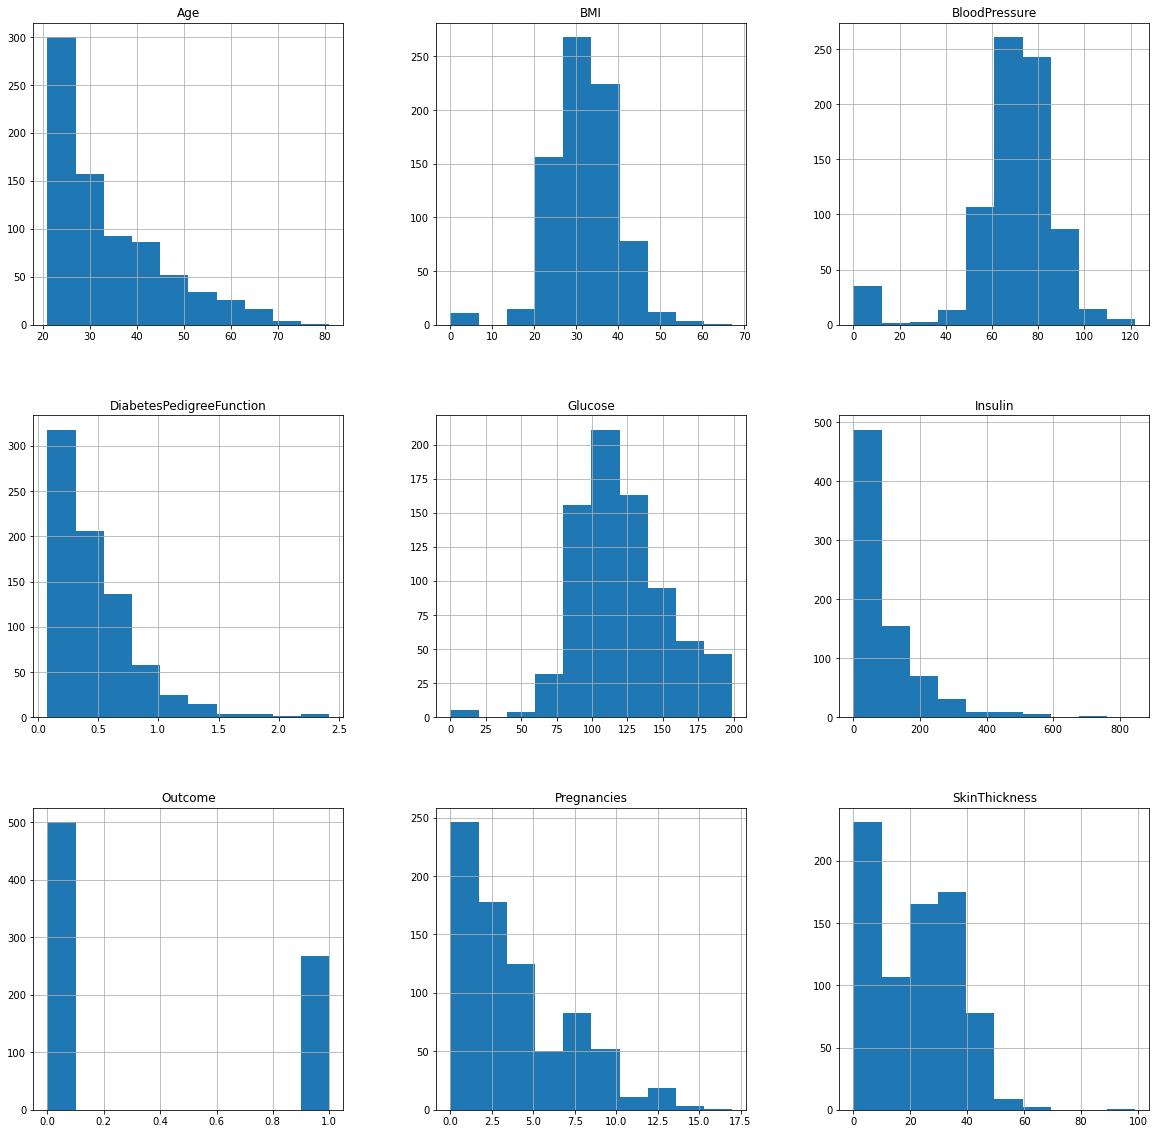

In [11]:
#data distributions

import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

##### case counts

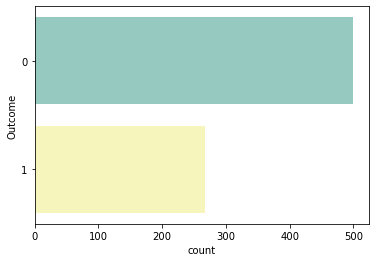


 1 : People who have diabetes 
 0 : People who do not have diabetes

 There are: 
 500 patients without diabetes 
 268 patients with diabetes


In [12]:
#case counts
sns.countplot(y='Outcome',data=data, palette="Set3")
plt.show()
cases = data.Outcome.value_counts()
print("\n 1 : People who have diabetes \n 0 : People who do not have diabetes")
print(f"\n There are: \n {cases[0]} patients without diabetes \n {cases[1]} patients with diabetes")

#### Analysing Age and Outcome plot

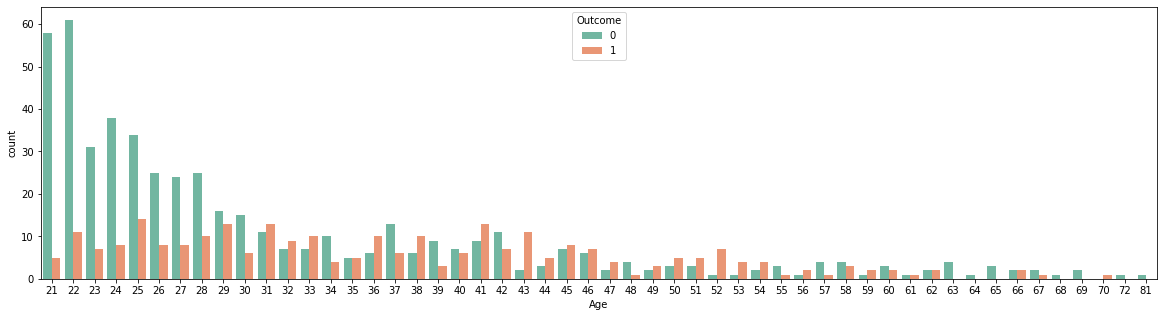

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',data = data, hue = 'Outcome', palette= "Set2")
plt.show()

#### The risk of diabtes is more at the age of ranging 22 to 41.
Higher risk at the age of 25

#### ANALYSING BMI and Outcome

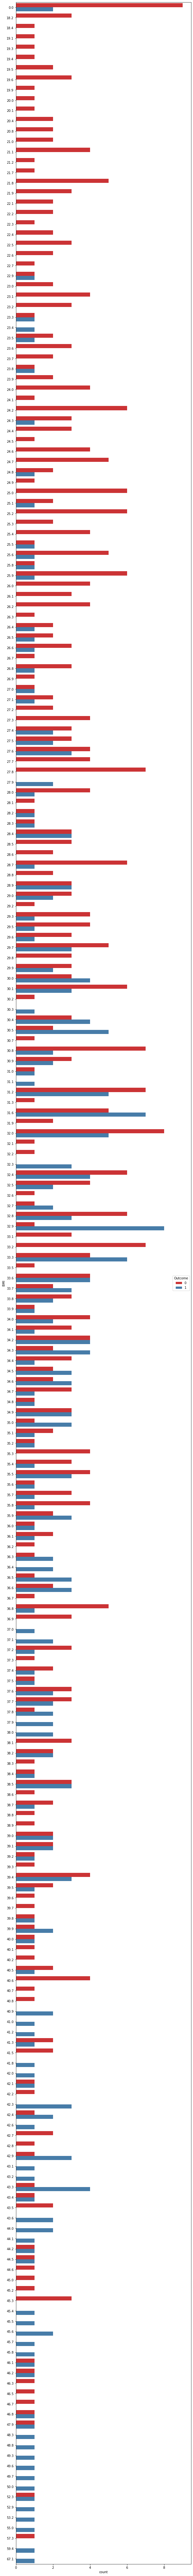

' 0 : No diabetes  1: Having diabetes'

In [14]:
plt.figure(figsize=(10,150))
sns.countplot(y='BMI',data = data,hue="Outcome", palette= "Set1")
plt.show()

""" 0 : No diabetes  1: Having diabetes"""

####  From, the above plot People with BMI 32.9 has high possibilities of  Diabetes

#### ANALYSING Glucose and Outcome

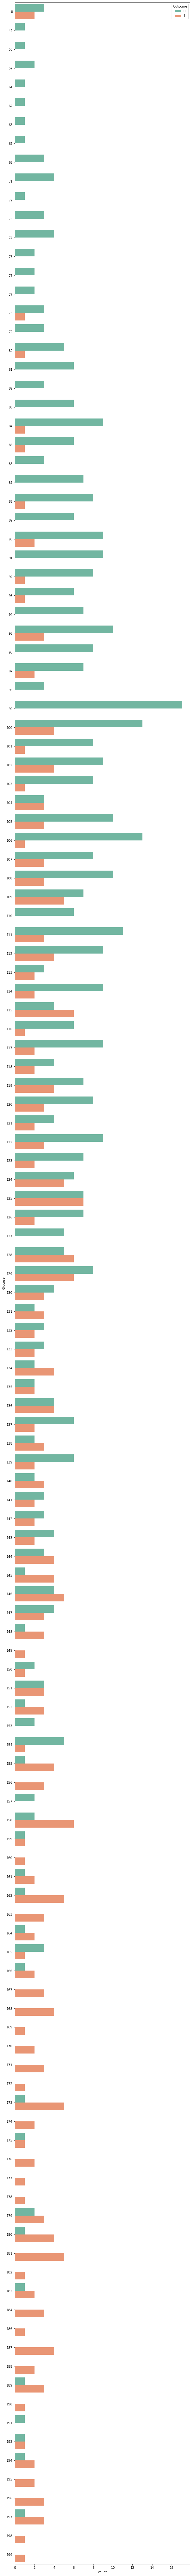

' 0 : No diabetes  1: Having diabetes'

In [15]:
plt.figure(figsize=(10,150))
sns.countplot(y='Glucose',data = data,hue="Outcome", palette= "Set2")
plt.show()

""" 0 : No diabetes  1: Having diabetes"""

#### People having Glucose level of ranging 90 to 158 have risk of having diabetes
And People with Glucose level of 125 and 158 have high risk

### PREPARE DATA

#### Feature Slection using Correlation Matrix

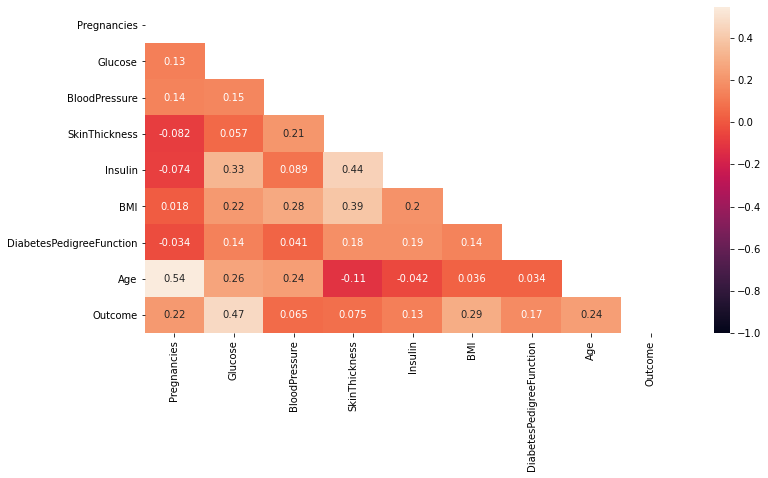

In [40]:
#feature selection


import numpy as np
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(12,6))
matrix = np.triu(data.corr())
cor = data.corr()
sns.heatmap(cor, annot=True, mask= matrix, vmin =-1)
plt.show()



In [22]:
#Correlation with output variable

cor_target = abs(cor["Outcome"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target >= 0.4]
relevant_features

Glucose    0.466581
Outcome    1.000000
Name: Outcome, dtype: float64

#### From the Heatmap, Glucose and Outcome has High Correlation

#### Normalise Data

In [25]:
#Normalising the dataset
from sklearn import preprocessing
import pandas as pd
db = pd.read_csv("Diabetes Database.csv")
pre = preprocessing.normalize(db)
pre


array([[0.03355185, 0.82761219, 0.40262215, ..., 0.00350617, 0.27959871,
        0.00559197],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.00295683, 0.26114412,
        0.        ],
       [0.04039717, 0.9240852 , 0.32317734, ..., 0.00339336, 0.16158867,
        0.00504965],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.00131885, 0.16149234,
        0.        ],
       [0.00665291, 0.83826692, 0.39917472, ..., 0.00232187, 0.31268687,
        0.00665291],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.00249308, 0.18203439,
        0.        ]])

### Algorithm Selection

Since the problem statement states we have to predict people by with diabetes,Supervised machine learning algorithm can be used.

The dataset have discrete value, so classisfication algorithm is choosed.Since the Outcome is True/False the alogrithm must support Binary classification

Out of Classification algorithms Logistic Regression is selected

In [26]:
from sklearn.model_selection import train_test_split
predictors = data.drop("Outcome",axis=1)
target = data["Outcome"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.25,random_state=0)

In [27]:
print(X_train.shape)

(576, 8)


In [28]:
print(X_test.shape)

(192, 8)


In [29]:
print(Y_train.shape)

(576,)


In [30]:
print(Y_test.shape)

(192,)


### MODEL GENERATION

#### Logistic Regression

In [31]:
#logistic

from sklearn.linear_model import LogisticRegression

Features = ['BMI','Glucose','Age']
x = data[Features]
y = data["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=1)

accuracy_list = []

log_reg = LogisticRegression()

log_reg.fit(X_train,Y_train)

log_reg_pred = log_reg.predict(X_test)
max_iter = 5000

C:\Users\priya\anaconda3_2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, log_reg_pred)

array([[115,  15],
       [ 25,  37]], dtype=int64)

True positive - 115;  True negative - 37; False positive - 15; False negative - 37

##### Accuracy

In [33]:
from sklearn.metrics import accuracy_score
from colorama import Fore, Back, Style 
log_reg_acc = accuracy_score(Y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

print(Fore.BLUE +"Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  79.17%


##### Precision score

In [34]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, log_reg_pred, average=None)
print(Fore.BLUE +"Precision Score is", precision)

Precision Score is [0.82142857 0.71153846]


##### Recall score

In [35]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, log_reg_pred, average=None)
print(Fore.BLUE +"Recall_score is ",recall)

Recall_score is  [0.88461538 0.59677419]


##### F1 score

In [36]:
F1 = 2 * (precision * recall) / (precision + recall)
print(Fore.BLUE +"F1-score is",F1)

F1-score is [0.85185185 0.64912281]


Therefore, here we created a supervised machine learning model to predict the people who has diabetes with an accuracy of about 79.17% which is more than 70% 